In [1]:
import numpy as np
import pandas as pd
# import seaborn as sns

# sklearn package
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from matplotlib import pyplot as plt
from ipynb.fs.full.utils import check_shape, printmd, modelEvaluation

## Read CSV

In [2]:
# read training file 1
training1 = pd.read_csv("data/training1.csv")

# read training file 2
training2 = pd.read_csv("data/training2.csv")

# read testing file
X_test = pd.read_csv('data/test.csv')

# read testing labels
y_test = pd.read_csv('data/sample_valid_predictions.csv')

# Overview of Datasets
## check dimensions

In [20]:
# print shape of training and testing datasets
printmd("**Training Set 1:**", color='blue')
check_shape(training1)
printmd("**Training Set 2:**", color='blue')
check_shape(training2)
printmd("**Test Features:**", color='blue')
check_shape(X_test)
printmd("**Test Labels:**", color='blue')
check_shape(y_test)

<span style='color:blue'>**Training Set 1:**</span>


Number or rows in dataset: 600

Number or columns in dataset: 4610


<span style='color:blue'>**Training Set 2:**</span>


Number or rows in dataset: 2800

Number or columns in dataset: 4610


<span style='color:blue'>**Test Features:**</span>


Number or rows in dataset: 2000

Number or columns in dataset: 4608


<span style='color:blue'>**Test Labels:**</span>


Number or rows in dataset: 2000

Number or columns in dataset: 1


## Count NAN in each Column

In [21]:
# count NAN values in training set 1 
printmd("**Training Set 1:**", color='blue')
print(training1.isna().sum())
# count NAN values in training set 2
printmd("**Training Set 2:**", color='blue')
print(training2.isna().sum())
# count NAN values in testing set 
printmd("**Test Features:**", color='blue')
print(X_test.isna().sum())

<span style='color:blue'>**Training Set 1:**</span>

CNNs          0
CNNs.1        0
CNNs.2        0
CNNs.3        0
CNNs.4        0
             ..
GIST.509      0
GIST.510      0
GIST.511      0
label         0
confidence    0
Length: 4610, dtype: int64


<span style='color:blue'>**Training Set 2:**</span>

CNNs          0
CNNs.1        0
CNNs.2        0
CNNs.3        0
CNNs.4        0
             ..
GIST.509      0
GIST.510      0
GIST.511      0
label         0
confidence    0
Length: 4610, dtype: int64


<span style='color:blue'>**Test Features:**</span>

CNNs        0
CNNs.1      0
CNNs.2      0
CNNs.3      0
CNNs.4      0
           ..
GIST.507    0
GIST.508    0
GIST.509    0
GIST.510    0
GIST.511    0
Length: 4608, dtype: int64


# Preprocessing
## Remove NAN Values

In [5]:
# Replace NAN value by mean value of that row
training1 = training1.apply(lambda row: row.fillna(row.mean()), axis=1)
training2 = training2.apply(lambda row: row.fillna(row.mean()), axis=1)
X_test = X_test.apply(lambda row: row.fillna(row.mean()), axis=1)

# print shape of training and testing datasets
printmd("**Training Set 1:**", color='blue')
print(training1.isna().sum())
printmd("**Training Set 2:**", color='blue')
print(training2.isna().sum())
printmd("**Test Features:**", color='blue')
print(X_test.isna().sum())

<span style='color:blue'>**Training Set 1:**</span>

CNNs          0
CNNs.1        0
CNNs.2        0
CNNs.3        0
CNNs.4        0
             ..
GIST.509      0
GIST.510      0
GIST.511      0
label         0
confidence    0
Length: 4610, dtype: int64


<span style='color:blue'>**Training Set 2:**</span>

CNNs          0
CNNs.1        0
CNNs.2        0
CNNs.3        0
CNNs.4        0
             ..
GIST.509      0
GIST.510      0
GIST.511      0
label         0
confidence    0
Length: 4610, dtype: int64


<span style='color:blue'>**Test Features:**</span>

CNNs        0
CNNs.1      0
CNNs.2      0
CNNs.3      0
CNNs.4      0
           ..
GIST.507    0
GIST.508    0
GIST.509    0
GIST.510    0
GIST.511    0
Length: 4608, dtype: int64


## Merge Training Sets

In [6]:
# merge training set 1 and training set 2
df = pd.concat([training1, training2], axis=0)

# ccheck shape of final training set after concatination
printmd("**Training Set:**", color='blue')
check_shape(df)

<span style='color:blue'>**Training Set:**</span>


Number or rows in dataset: 3400

Number or columns in dataset: 4610


## Split training features and labels

In [7]:
# split featres and labels of training set
X = df.iloc[:,:-2]
y = df.iloc[:,-2]

# Feature Selection

In [8]:
# extract feature importance using random forest
def RF_feature_selection(X, y, imp_features):
    model = RandomForestClassifier()
    # fit the model
    model.fit(X, y)
    
    sorted_idx = model.feature_importances_.argsort()[-imp_features:]
#     plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
#     plt.xlabel("Random Forest Feature Importance")
    return sorted_idx

# Model Training

In [9]:
classes = ['0','1']
#dic form store results of all models
collect_results_of_all_model= {
    'Metrics':['accuracy','precision','recall','f1-score']
}
max_score = 0
best_model = ""
final_predictions = []

## RF with default parameters

<center><h1 style='color:blue'>Results of Random_Forest_50F</h1></center>

========== Random_Forest_50F ==========

Accuracy on validation set: 0.5030

Classification report : 
               precision    recall  f1-score   support

           0       0.52      0.50      0.51      1024
           1       0.49      0.51      0.50       976

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



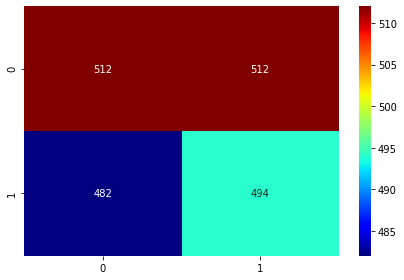

<center><h1 style='color:blue'>Results of Random_Forest_100F</h1></center>

========== Random_Forest_100F ==========

Accuracy on validation set: 0.5045

Classification report : 
               precision    recall  f1-score   support

           0       0.52      0.50      0.51      1027
           1       0.49      0.51      0.50       973

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



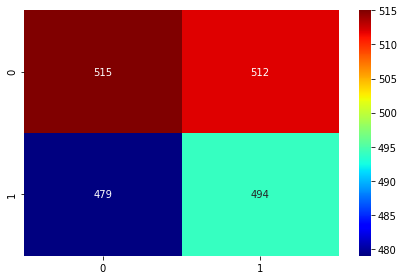

<center><h1 style='color:blue'>Results of Random_Forest_200F</h1></center>

========== Random_Forest_200F ==========

Accuracy on validation set: 0.5110

Classification report : 
               precision    recall  f1-score   support

           0       0.53      0.51      0.52      1032
           1       0.50      0.51      0.50       968

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



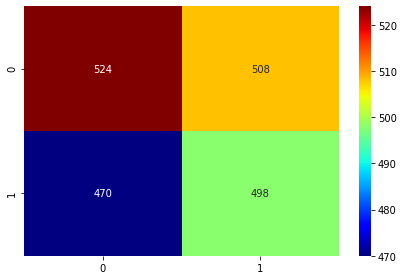

<center><h1 style='color:blue'>Results of Random_Forest_500F</h1></center>

========== Random_Forest_500F ==========

Accuracy on validation set: 0.5010

Classification report : 
               precision    recall  f1-score   support

           0       0.52      0.50      0.51      1046
           1       0.48      0.50      0.49       954

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



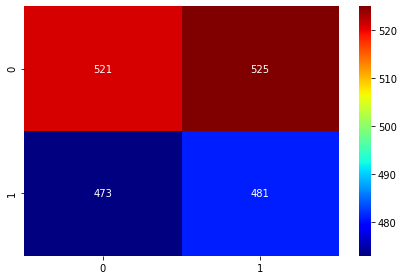

<center><h1 style='color:blue'>Results of Random_Forest_1000F</h1></center>

========== Random_Forest_1000F ==========

Accuracy on validation set: 0.5050

Classification report : 
               precision    recall  f1-score   support

           0       0.52      0.50      0.51      1036
           1       0.49      0.51      0.50       964

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.51      0.51      2000



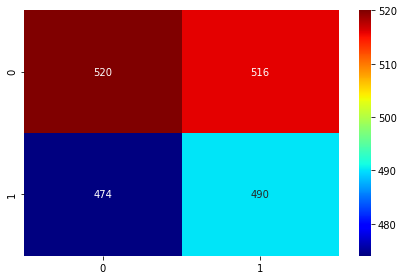

In [10]:
feature_list = [50, 100, 200, 500, 1000]

# extract number of features according to the 
# feature list and then train random forest with
# default parameters on importan feature set.
for feature_len in feature_list:
    Model_Name = "Random_Forest_{}F".format(feature_len)
    # select  important feature
    sorted_idx = RF_feature_selection(X, y, feature_len)
    # fetch training set with important features 
    X_train = X[X.columns[sorted_idx]]
    y_train = y
    
    # fetch testing set with important features 
    XX_test = X_test[X_test.columns[sorted_idx]]
    y_test = y_test

    # initialize model
    model = RandomForestClassifier()
    # fit the model
    model.fit(X_train, y_train)

    # make predictions on test set
    y_pred = model.predict(XX_test)
    y_pred = list(map(int, y_pred))
    
    # calculate evaluation measures like accuracy, prcision, recall, and F1 Score.
    printmd("Results of {}".format(Model_Name), color="blue", center=True)
    rf_results = modelEvaluation(y_test['prediction'], y_pred, Model_Name, classes)
    collect_results_of_all_model[Model_Name] = rf_results
    
    # calculate highest accuracy among the all trained models
    acc = rf_results[0]
    if acc > max_score:
        max_score = acc
        final_predictions = y_pred
        best_model = Model_Name

## RF with tunned Parameters

<center><h1 style='color:blue'>Results of Tuned Random_Forest_50F</h1></center>

========== Tuned Random_Forest_50F ==========

Accuracy on validation set: 0.5035

Classification report : 
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      1001
           1       0.50      0.51      0.50       999

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



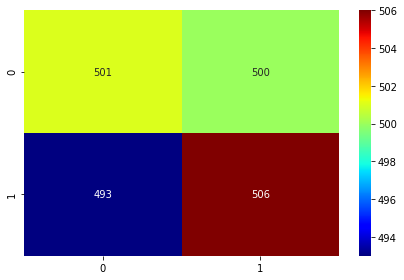

<center><h1 style='color:blue'>Results of Tuned Random_Forest_100F</h1></center>

========== Tuned Random_Forest_100F ==========

Accuracy on validation set: 0.5030

Classification report : 
               precision    recall  f1-score   support

           0       0.52      0.50      0.51      1030
           1       0.49      0.51      0.50       970

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



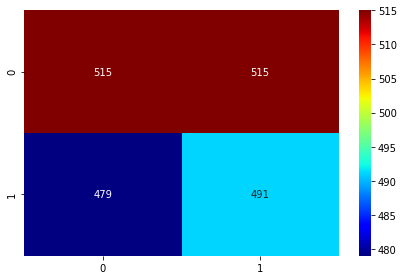

<center><h1 style='color:blue'>Results of Tuned Random_Forest_200F</h1></center>

========== Tuned Random_Forest_200F ==========

Accuracy on validation set: 0.5060

Classification report : 
               precision    recall  f1-score   support

           0       0.53      0.50      0.52      1046
           1       0.48      0.51      0.50       954

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



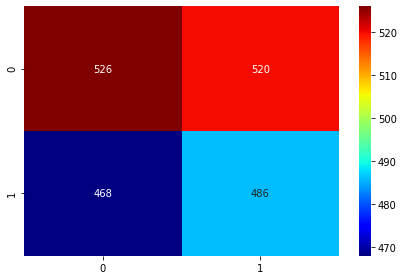

<center><h1 style='color:blue'>Results of Tuned Random_Forest_500F</h1></center>

========== Tuned Random_Forest_500F ==========

Accuracy on validation set: 0.5115

Classification report : 
               precision    recall  f1-score   support

           0       0.53      0.51      0.52      1041
           1       0.49      0.52      0.50       959

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



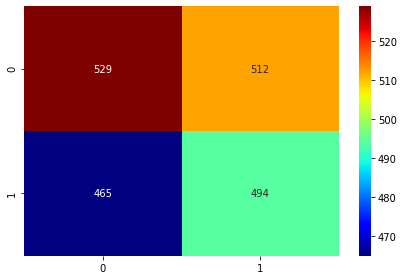

<center><h1 style='color:blue'>Results of Tuned Random_Forest_1000F</h1></center>

========== Tuned Random_Forest_1000F ==========

Accuracy on validation set: 0.4990

Classification report : 
               precision    recall  f1-score   support

           0       0.52      0.50      0.51      1048
           1       0.48      0.50      0.49       952

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



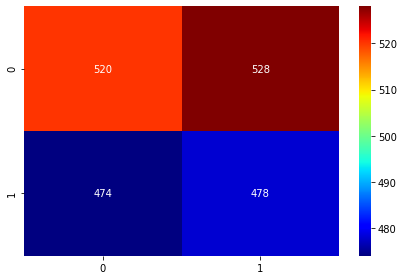

In [11]:
feature_list = [50, 100, 200, 500, 1000]

# extract number of features according to the 
# feature list and then train random forest with
# default parameters on importan feature set.
for feature_len in feature_list:
    Model_Name = "Tuned Random_Forest_{}F".format(feature_len)
    # select  important feature
    sorted_idx = RF_feature_selection(X, y, feature_len)
    # fetch training set with important features 
    X_train = X[X.columns[sorted_idx]]
    y_train = y
    
    # fetch testing set with important features 
    XX_test = X_test[X_test.columns[sorted_idx]]
    y_test = y_test

    # initialize model
    model = RandomForestClassifier(n_estimators=100, max_depth=None, bootstrap=True)
    # fit the model
    model.fit(X_train, y_train)

    # make predictions on test set
    y_pred = model.predict(XX_test)
    y_pred = list(map(int, y_pred))
    
    # calculate evaluation measures like accuracy, prcision, recall, and F1 Score.
    printmd("Results of {}".format(Model_Name), color="blue", center=True)
    rf_results = modelEvaluation(y_test['prediction'], y_pred, Model_Name, classes)
    collect_results_of_all_model[Model_Name] = rf_results
    
    # calculate highest accuracy among the all trained models
    acc = rf_results[0]
    if acc > max_score:
        max_score = acc
        final_predictions = y_pred
        best_model = Model_Name

## Best Model Name and Score

In [12]:
# print name and score of best model
printmd(best_model, color="blue", center=True)
printmd(max_score, color="blue", center=True)
printmd("**************************************", color="blue", center=True)

<center><h1 style='color:blue'>Tuned Random_Forest_500F</h1></center>

<center><h1 style='color:blue'>0.5115</h1></center>

<center><h1 style='color:blue'>**************************************</h1></center>

# Plot Graphs

In [13]:
from tabulate import tabulate 
# create dataframe of models results
metrics_data_frame = pd.DataFrame(collect_results_of_all_model)#create dataframe
metrics_data_frame = metrics_data_frame.set_index('Metrics')#set index
metrics_data_frame.T

## Accuracy Comparison of RF with Different Parametrs

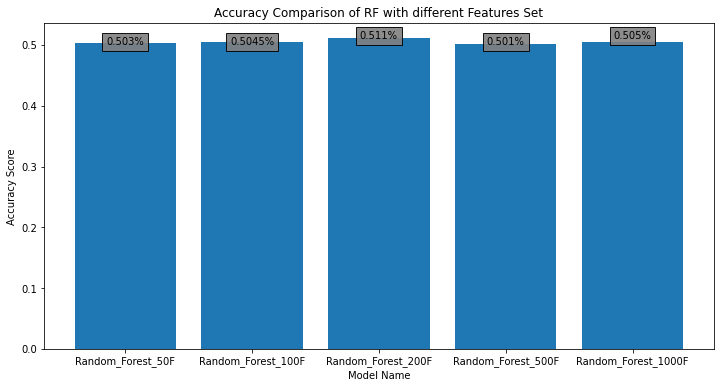

In [14]:
plot_df = metrics_data_frame.iloc[:, 0:5]
models_accuracy = plot_df.iloc[0].tolist()#accuracy
models_names = plot_df.columns.tolist()#name of model
plt.figure(figsize=(12,6))
plt.bar(models_names,models_accuracy)#bar plot
plt.title("Models Accuracies", fontsize=18)#title

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],4)}%", ha = 'center', bbox=dict(facecolor='gray', alpha=0.9))

addLabels(models_names,models_accuracy)#adding labels
plt.xlabel("Model Name") # x-axis title
plt.ylabel("Accuracy Score") # y-axis title
plt.title("Accuracy Comparison of RF with different Features Set") # bar plot title
plt.show()

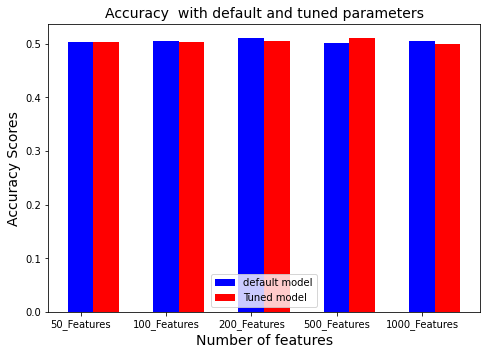

In [15]:
rf_default = list(metrics_data_frame.iloc[0,0:5]) # default models result
rf_tuned = list(metrics_data_frame.iloc[0,5:]) # tuned models results
data = [rf_default, rf_tuned] 
X = np.arange(5) # axis range
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.30) # configure position and color of firts bar
ax.bar(X + 0.30, data[1], color = 'r', width = 0.30) # configure position and color of second bar

ax.set_ylabel('Accuracy Scores', fontsize= 14) # X-axis label
ax.set_xlabel('Number of features', fontsize= 14) # y-axis label
ax.set_title('Accuracy  with default and tuned parameters', fontsize= 14) # bar plot title
plt.xticks(ticks = X ,labels = ["50_Features", "100_Features", "200_Features", "500_Features", "1000_Features"])
# ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['default model', 'Tuned model'])

In [16]:
predictions_df = pd.DataFrame(final_predictions, columns=['prediction']) # create dataframe of final predictions
predictions_df.to_csv("predictions.csv", index=False) # write predictions